In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from numpy import mean
from numpy import std

In [2]:
path = 'D://DS//Stater_Projects//breast_cancer.txt'

In [3]:
columns = ['age', 'year', 'nodes', 'class']

In [4]:
df = pd.read_csv(path,header=None,names=columns)
df.head()

,age,year,nodes,class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
df.describe()

,age,year,nodes,class
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


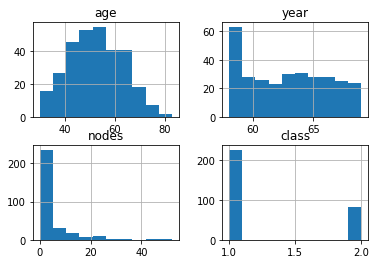

In [6]:
df.hist()
plt.show()

In [7]:
features, target = df.values[:, :-1], df.values[:, -1]

In [8]:
features = features.astype('float32')
target = LabelEncoder().fit_transform(target)

In [9]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.5, stratify=target, random_state=12345)

In [10]:
n_features = features.shape[1]

In [11]:
model = Sequential()
model.add(Dense(10,activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
history = model.fit(features_train, target_train, epochs=200, batch_size=16, verbose=0, validation_data=(features_test,target_test))

In [14]:
predict = model.predict_classes(features_test)
score = accuracy_score(target_test,predict)

D:\Packages\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [15]:
print('Accuracy: %.3f' % score)

Accuracy: 0.634


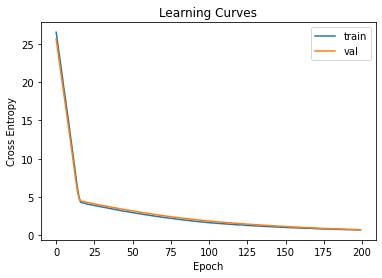

In [16]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [20]:
# load the dataset
df = pd.read_csv(path, header=None)
# split into input and output columns
features, target = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
features = features.astype('float32')
# encode strings to integer
le = LabelEncoder()
target = le.fit_transform(target)
# determine the number of input features
n_features = features.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
model.fit(features, target, epochs=200, batch_size=16, verbose=0)
# define a row of new data
trail_predict = [30,64,1]
# make prediction
predict = model.predict_classes([trail_predict])
# invert transform to get label for class
prediction = le.inverse_transform(predict)
# report prediction
print('Predicted: %s' % (prediction[0]))

Predicted: 1
